# **Suicide Rates Analysis**

# importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

py.offline.init_notebook_mode(connected = True)

%matplotlib inline

In [5]:
suicide = pd.read_csv(r"C:\Users\prash\Desktop\Jupyter Notebook\Data Analysis Projects\Suicide\master.csv\master.csv")
suicide.head(2)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent


In [6]:
print('Shape of dataset :', suicide.shape)

Shape of dataset : (27820, 12)


In [7]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [8]:
suicide.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

# Number of suicide committed in each country

In [10]:
suicide_in_countries = suicide.groupby('country')
country_suicide_series = suicide_in_countries.suicides_no.sum().sort_values(ascending=False)
country_suicide_series

country
Russian Federation       1209742
United States            1034013
Japan                     806902
France                    329127
Ukraine                   319950
                          ...   
Maldives                      20
Antigua and Barbuda           11
San Marino                     4
Saint Kitts and Nevis          0
Dominica                       0
Name: suicides_no, Length: 101, dtype: int64

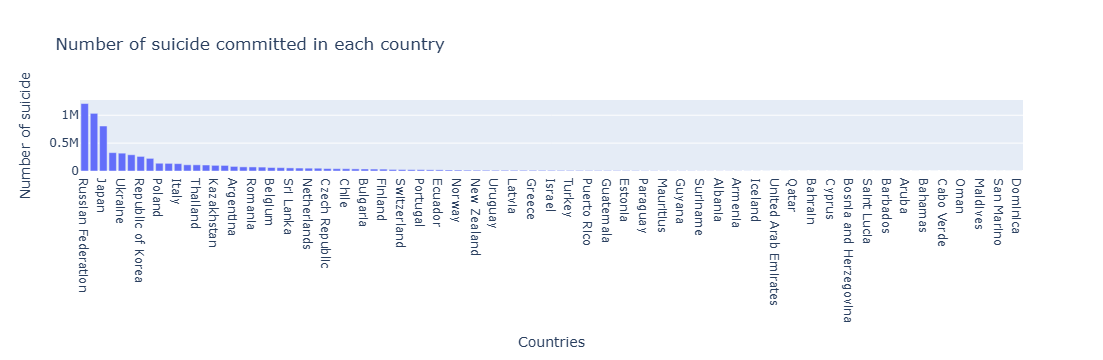

In [11]:
trace1 = go.Bar(
    y = country_suicide_series.values,
    x = country_suicide_series.index
)
data = [trace1]
layout = go.Layout(
    title = "Number of suicide committed in each country",
    xaxis = {
        'title':'Countries'
    },
    yaxis = {
        'title':'Number of suicide'
    }
)
figure = go.Figure(data = data, layout = layout)
py.offline.iplot(figure)

# Number of suicides genderwise

In [13]:
genderwise_suicide = suicide.pivot_table(index = 'sex', aggfunc = 'sum').suicides_no
genderwise_suicide

sex
female    1559510
male      5188910
Name: suicides_no, dtype: int64

In [14]:
suicide.suicides_no.sum()

6748420

<Axes: xlabel='sex', ylabel='suicides_no'>

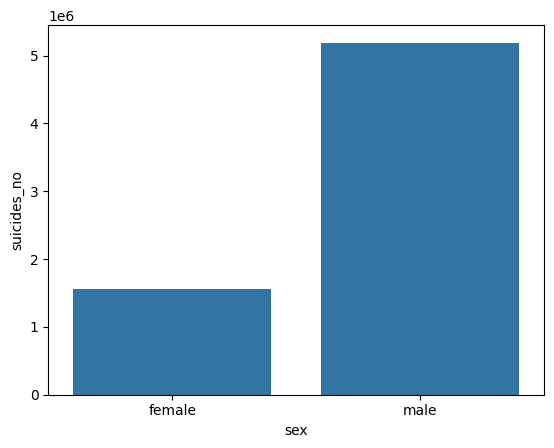

In [15]:
sns.barplot(genderwise_suicide)

# Number of suicides genderwise in each country

In [17]:
country_wise_gender_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'sex' : suicide.sex,
    'suicides_no': suicide.suicides_no
})

In [18]:
country_wise_gender_suicide = country_wise_gender_suicide_df.pivot_table(index = 'country', columns = 'sex', aggfunc = 'sum')
country_wise_gender_suicide

suicides_no        
sex                       female    male
country                                 
Albania                      693    1277
Antigua and Barbuda            1      10
Argentina                  18326   63893
Armenia                      495    1410
Aruba                         17      84
...                          ...     ...
United Arab Emirates          98     524
United Kingdom             32687  104118
United States             213797  820216
Uruguay                     2820   10318
Uzbekistan                  9260   25543

[101 rows x 2 columns]

In [19]:
# country_wise_gender_suicide.plot.bar(stacked = True, figsize = (30, 10), cmap = 'coolwarm')

In [20]:
country_wise_gender_suicide.columns = country_wise_gender_suicide.columns.droplevel()

In [21]:
country_wise_gender_suicide = country_wise_gender_suicide.sort_values(by = 'female', ascending = False)
country_wise_gender_suicide

sex,female,male
country,,
Japan,251630,555272
Russian Federation,214330,995412
United States,213797,820216
France,89419,239708
Republic of Korea,82615,179115
...,...,...
Antigua and Barbuda,1,10
Saint Kitts and Nevis,0,0
Oman,0,33


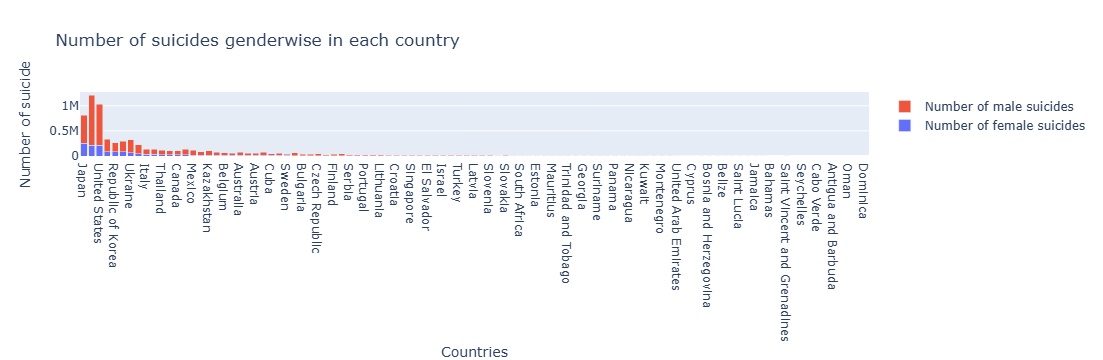

In [22]:
trace1 = go.Bar(
    x = country_wise_gender_suicide.index,
    y = country_wise_gender_suicide.female,
    name = 'Number of female suicides'
)
trace2 = go.Bar(
    x = country_wise_gender_suicide.index,
    y = country_wise_gender_suicide.male,
    name = 'Number of male suicides'
)
data = [trace1, trace2]
layout = go.Layout(
    barmode = 'stack',
    title = "Number of suicides genderwise in each country",
    xaxis = {
        'title':"Countries"
    },
    yaxis ={
        'title':"Number of suicide"
    }
)
fig = go.Figure(data = data, layout = layout)
py.offline.iplot(fig)

# Suicide Committed by various age groups

In [24]:
agewise_suicides = suicide.pivot_table(index='age', aggfunc = 'sum')
agewise_suicides.head(2)

,gdp_for_year ($),HDI for year,country,country-year,gdp_per_capita ($),generation,population,sex,suicides/100k pop,suicides_no,year
age,,,,,,,,,,,
15-24 years,"2,156,624,9002,156,624,9002,126,000,0002,126,0...",1082.582,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,Albania1987Albania1987Albania1988Albania1988Al...,78341054,Generation XGeneration XGeneration XGeneration...,8642946896,malefemalemalefemalemalefemalemalefemalemalefe...,41532.69,808542,9289920
25-34 years,"2,156,624,9002,156,624,9002,126,000,0002,126,0...",1082.582,AlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlbaniaAlba...,Albania1987Albania1987Albania1988Albania1988Al...,78341054,BoomersBoomersBoomersBoomersBoomersBoomersBoom...,8438103587,malefemalefemalemalemalefemalemalefemalemalefe...,56571.52,1123912,9289920


In [25]:
agewise_suicides.columns

Index([' gdp_for_year ($) ', 'HDI for year', 'country', 'country-year',
       'gdp_per_capita ($)', 'generation', 'population', 'sex',
       'suicides/100k pop', 'suicides_no', 'year'],
      dtype='object')

In [26]:
agewise_suicides_df = pd.DataFrame({
    'suicides_no' : agewise_suicides['suicides_no']
}, index = agewise_suicides.index)

<Axes: xlabel='age'>

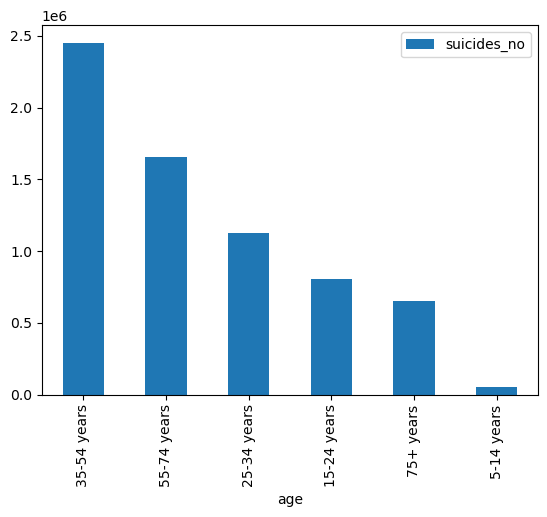

In [27]:
agewise_suicides_df.sort_values(by = 'suicides_no', ascending = False).plot.bar()

# Suicides committed by various age groups in male and female

In [29]:
gender_agewise_suicide_df = pd.DataFrame({
    'sex' : suicide.sex,
    'age' : suicide.age,
    'suicide_no' : suicide.suicides_no
})
gender_agewise_suicide_df.head()

,sex,age,suicide_no
0,male,15-24 years,21
1,male,35-54 years,16
2,female,15-24 years,14
3,male,75+ years,1
4,male,25-34 years,9


In [30]:
gender_agewise_suicide = gender_agewise_suicide_df.pivot_table(index = 'age', columns = 'sex', aggfunc = 'sum')
gender_agewise_suicide

suicide_no         
sex             female     male
age                            
15-24 years     175437   633105
25-34 years     208823   915089
35-54 years     506233  1945908
5-14 years       16997    35267
55-74 years     430036  1228407
75+ years       221984   431134

In [31]:
gender_agewise_suicide.iloc[0]

            sex   
suicide_no  female    175437
            male      633105
Name: 15-24 years, dtype: int64

array([<Axes: ylabel='(suicide_no, female)'>,
       <Axes: ylabel='(suicide_no, male)'>], dtype=object)

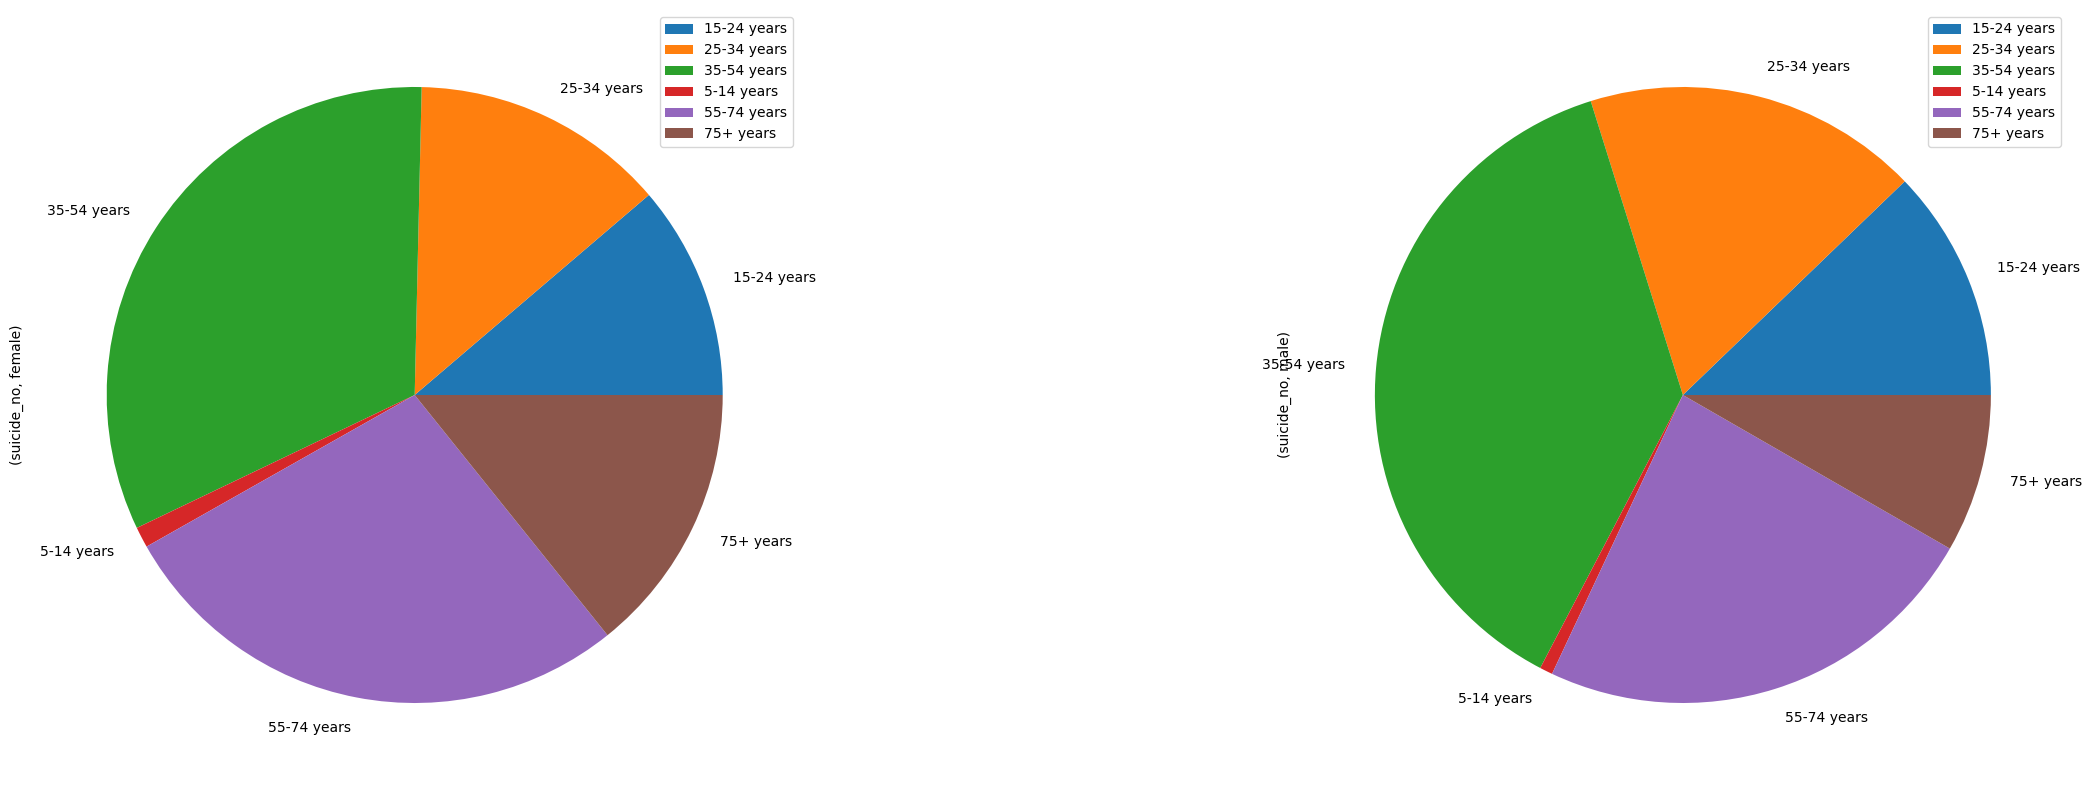

In [32]:
gender_agewise_suicide.plot.pie(subplots = True, figsize=(30,10))

In [33]:
gender_agewise_suicide.columns = gender_agewise_suicide.columns.droplevel()

In [34]:
gender_agewise_suicide

sex,female,male
age,,
15-24 years,175437,633105
25-34 years,208823,915089
35-54 years,506233,1945908
5-14 years,16997,35267
55-74 years,430036,1228407
75+ years,221984,431134


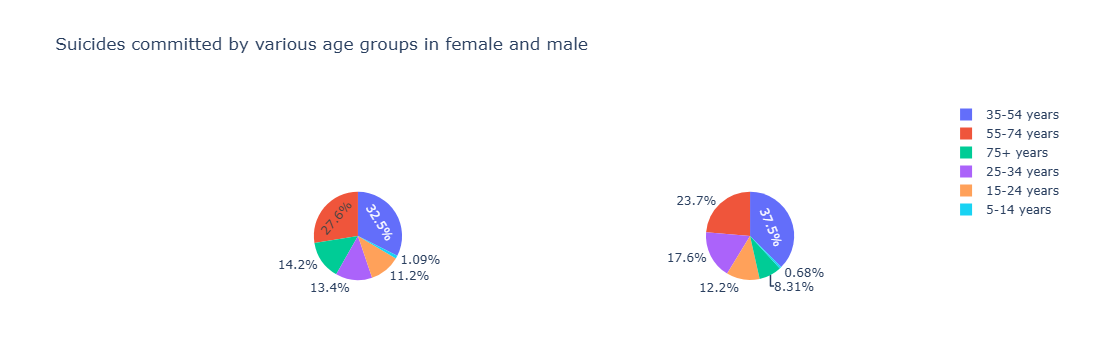

In [35]:
fig = {
    'data' : [
        {
            'labels' : gender_agewise_suicide.index,
            'values' : gender_agewise_suicide.female,
            'type' : 'pie',
            'name' : 'Female suicides no',
            'domain' : {'x':[0, .48],
                       'y':[0, .49]}
        },
        {
            'labels' : gender_agewise_suicide.index,
            'values' : gender_agewise_suicide.male,
            'type' : 'pie',
            'name' : 'Male suicides no',
            'domain' : {'x': [.52, 1],
                       'y': [0, .49]}
        }
    ],
    'layout' : {'title' : 'Suicides committed by various age groups in female and male'}
}

py.offline.iplot(fig)

# Suicides committed by various age groups in male and female in each country

In [37]:
country_gender_agewise_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'sex' : suicide.sex,
    'age' : suicide.age,
    'suicide_no' : suicide.suicides_no
})
country_gender_agewise_suicide_df.head()

,country,sex,age,suicide_no
0,Albania,male,15-24 years,21
1,Albania,male,35-54 years,16
2,Albania,female,15-24 years,14
3,Albania,male,75+ years,1
4,Albania,male,25-34 years,9


In [38]:
country_gender_agewise_suicide = country_gender_agewise_suicide_df.pivot_table(index = ['country', 'age'], columns = 'sex', aggfunc = 'sum')
country_gender_agewise_suicide

suicide_no      
sex                        female  male
country    age                         
Albania    15-24 years        253   293
           25-34 years        139   288
           35-54 years        173   418
           5-14 years          21    40
           55-74 years         68   196
...                           ...   ...
Uzbekistan 25-34 years       2191  6387
           35-54 years       1797  9167
           5-14 years         338  1038
           55-74 years        850  2745
           75+ years          319   298

[605 rows x 2 columns]

<Axes: ylabel='country,age'>

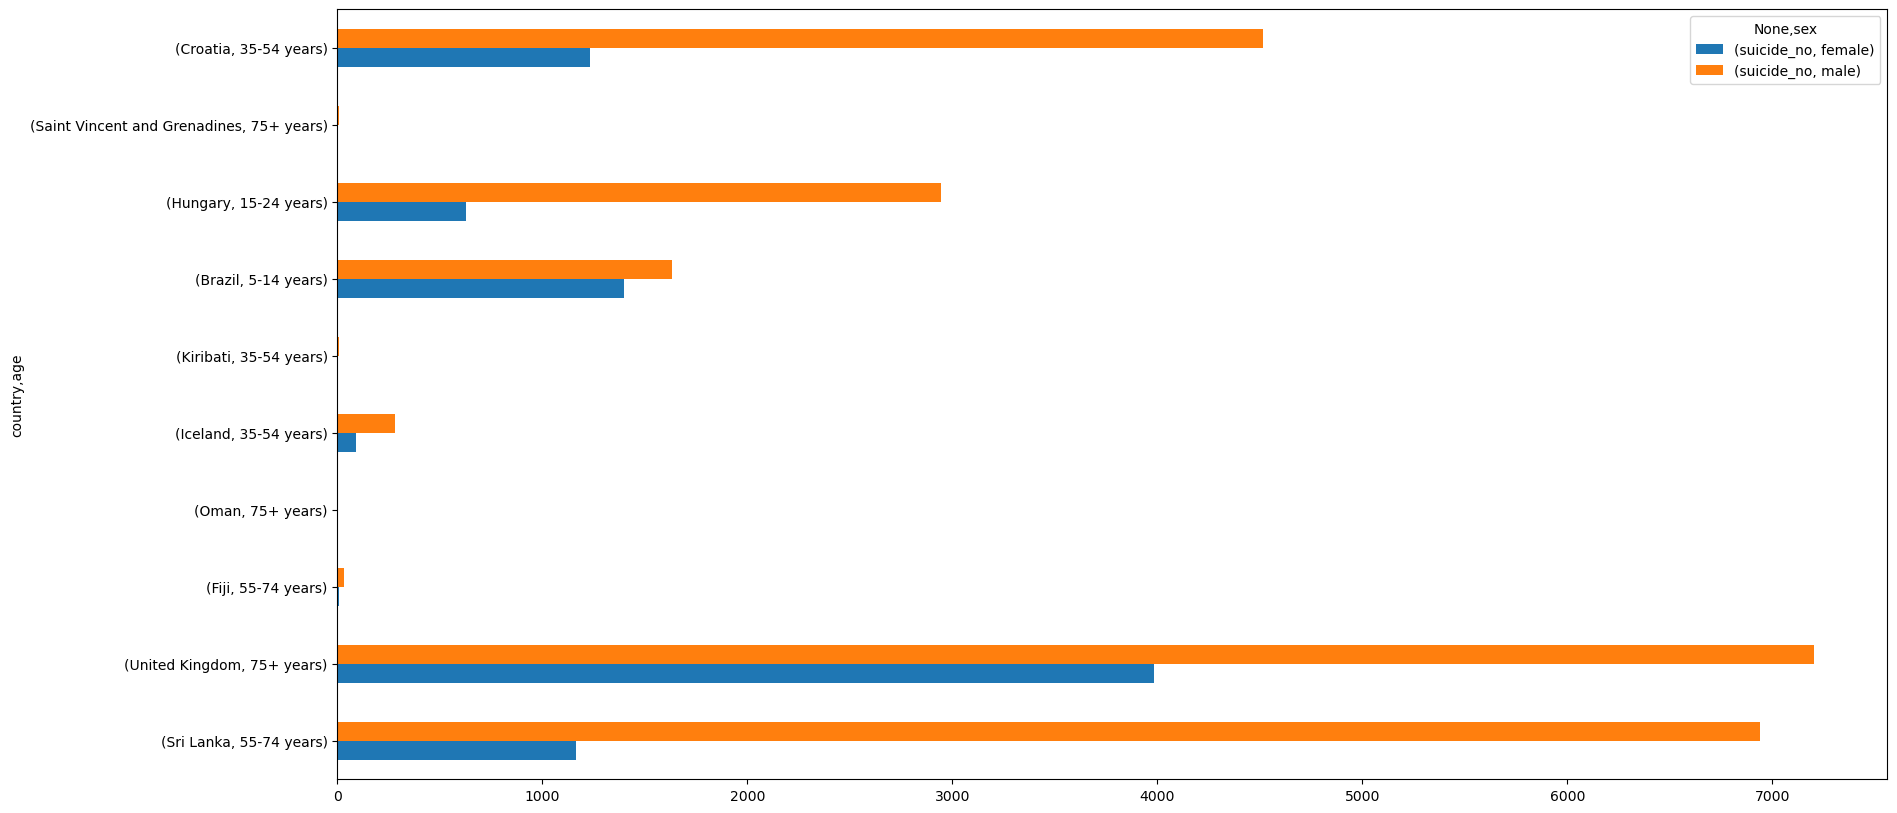

In [39]:
country_gender_agewise_suicide.sample(10).plot.barh(figsize = (20,10))

# Population and suicide rate in yearly basics

In [41]:
suicide['year'].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016],
      dtype=int64)

In [42]:
yearly_suicide = suicide.groupby('year').mean(numeric_only = True)
yearly_suicide

,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($)
year,,,,,
1985,201.498264,1.751042e+06,11.826198,0.699162,6091.229167
1986,209.496528,1.788038e+06,11.423333,NaN,7126.104167
1987,195.743827,1.689861e+06,11.644213,NaN,8712.592593
1988,205.826531,1.792678e+06,12.709405,NaN,9983.857143
1989,256.801282,1.963965e+06,12.879071,NaN,9725.038462
1990,251.772135,1.909662e+06,12.862956,0.715800,9806.328125
1991,257.838542,1.940089e+06,13.438880,NaN,10132.937500
1992,271.119231,2.012230e+06,13.498564,NaN,10506.707692
1993,284.057692,1.962073e+06,13.833705,NaN,10553.584615


In [43]:
yearly_population = pd.DataFrame({
    'population' : yearly_suicide.population
})

yearly_suicide_no = pd.DataFrame({
    'suicide_no' : yearly_suicide.suicides_no
})


In [44]:
yearly_population.head()

,population
year,
1985,1.751042e+06
1986,1.788038e+06
1987,1.689861e+06
1988,1.792678e+06
1989,1.963965e+06


<Axes: xlabel='year'>

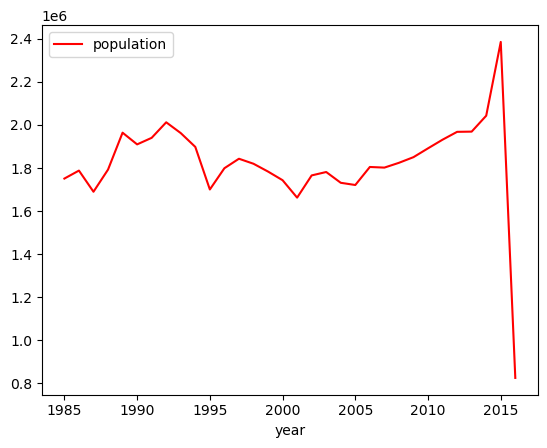

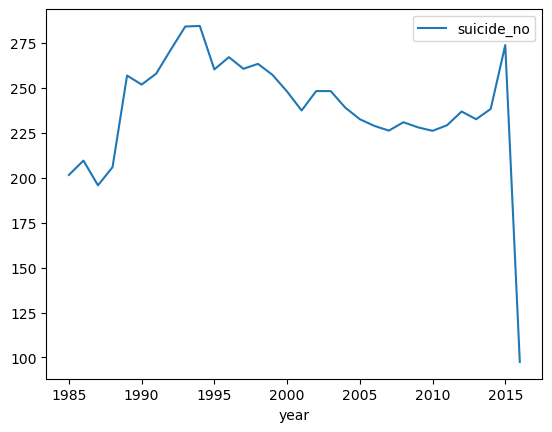

In [45]:
yearly_population.plot.line(color = 'red')
yearly_suicide_no.plot.line()

# Merge population and suicide no. with yearlywise

In [47]:
merge_pop_suicide = pd.merge(yearly_population, yearly_suicide_no, on='year')
merge_pop_suicide.head()

,population,suicide_no
year,,
1985,1.751042e+06,201.498264
1986,1.788038e+06,209.496528
1987,1.689861e+06,195.743827
1988,1.792678e+06,205.826531
1989,1.963965e+06,256.801282


<Axes: xlabel='year'>

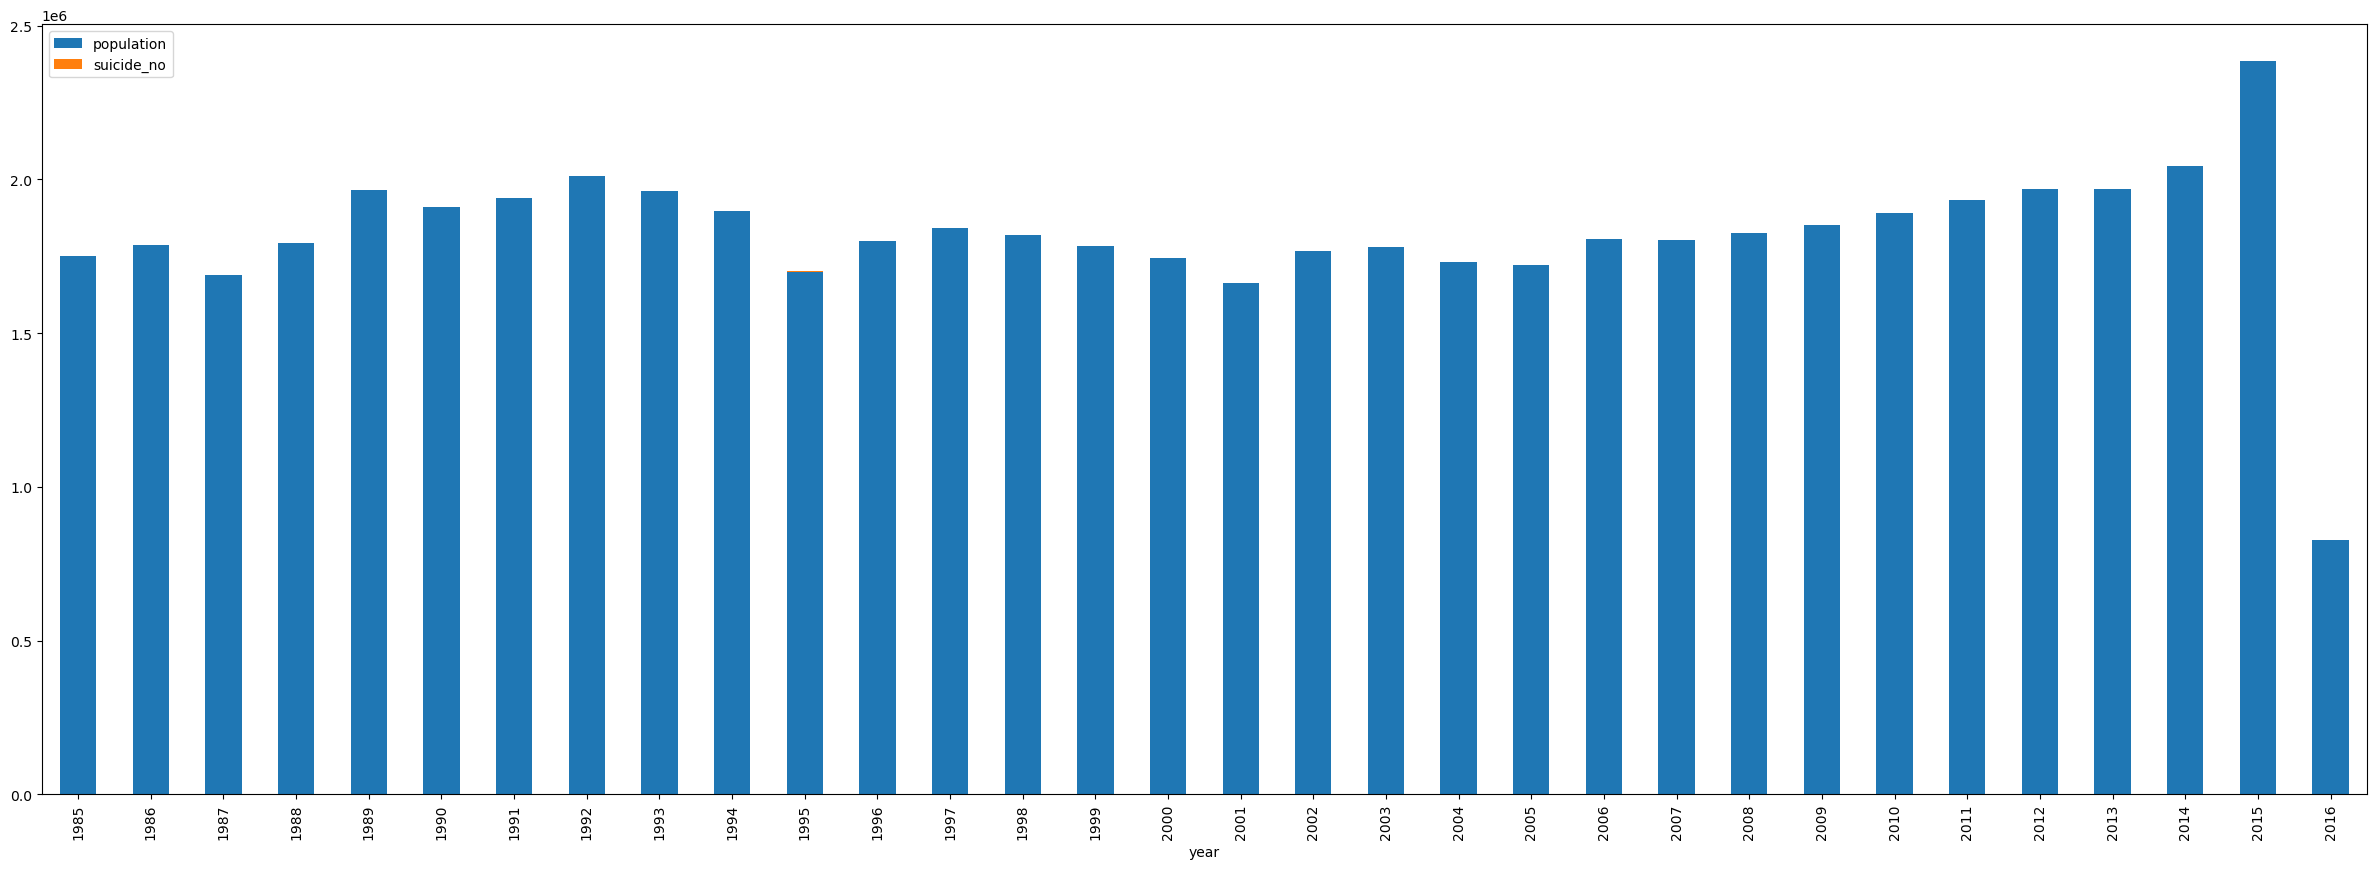

In [48]:
merge_pop_suicide.plot.bar(stacked = True, figsize = (30, 10))

# Suicide rate in male and female yearly

In [50]:
yearly_countrywise_gender_suicide_df = pd.DataFrame({
    "year" : suicide.year,
    "sex" : suicide.sex, 
    "suicides_no" : suicide.suicides_no
})

In [51]:
yearly_countrywise_gender_suicide = yearly_countrywise_gender_suicide_df.pivot_table(index = 'year', columns = 'sex', aggfunc = 'mean')
yearly_countrywise_gender_suicide.head()

suicides_no            
sex       female        male
year                        
1985  112.774306  290.222222
1986  117.541667  301.451389
1987  108.043210  283.444444
1988  112.295918  299.357143
1989  132.567308  381.035256

In [52]:
x = yearly_countrywise_gender_suicide.index

In [53]:
yearly_countrywise_gender_suicide.columns

MultiIndex([('suicides_no', 'female'),
            ('suicides_no',   'male')],
           names=[None, 'sex'])

In [54]:
yearly_countrywise_gender_suicide.columns = ['female', 'male']

In [55]:
yearly_countrywise_gender_suicide.head()

,female,male
year,,
1985,112.774306,290.222222
1986,117.541667,301.451389
1987,108.043210,283.444444
1988,112.295918,299.357143
1989,132.567308,381.035256


In [56]:
female = yearly_countrywise_gender_suicide['female']
male = yearly_countrywise_gender_suicide['male']

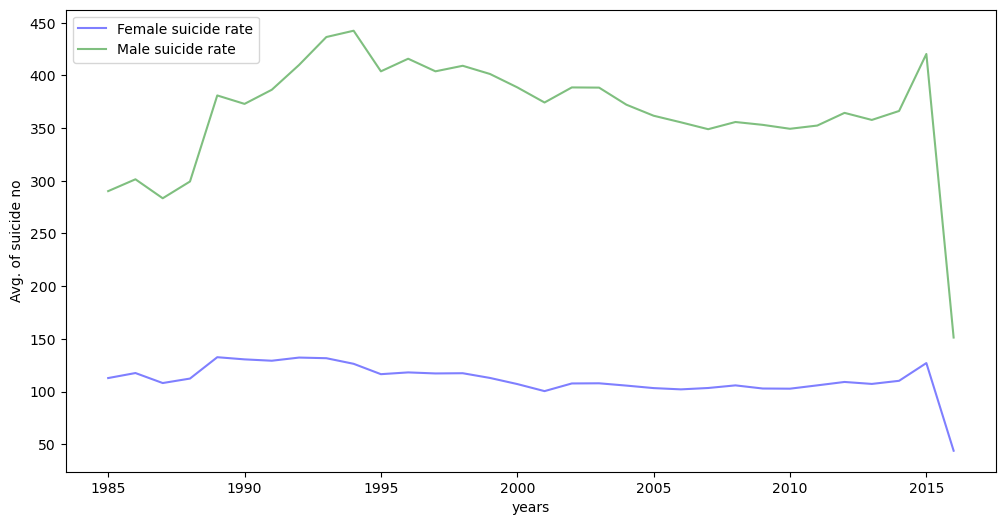

In [57]:
fig, ax = plt.subplots(figsize=(12,6))

ax.plot(x, female, color="blue", alpha = 0.5, label = 'Female suicide rate')
ax.plot(x, male, color = "green", alpha = 0.5, label = 'Male suicide rate')

ax.set_xlabel('years')
ax.set_ylabel('Avg. of suicide no')
ax.legend()

# Suicide rate over the period of time in each country

In [114]:
country_yearwise_suicide_df = pd.DataFrame({
    'country' : suicide.country,
    'year' : suicide.year,
    'suicides_no' : suicide.suicides_no
})
country_yearwise_suicide_df

,country,year,suicides_no
0,Albania,1987,21
1,Albania,1987,16
2,Albania,1987,14
3,Albania,1987,1
4,Albania,1987,9
...,...,...,...
27815,Uzbekistan,2014,107
27816,Uzbekistan,2014,9
27817,Uzbekistan,2014,60
27818,Uzbekistan,2014,44


In [118]:
country_yearwise_suicide = country_yearwise_suicide_df.pivot_table(index = 'year', columns = 'country', aggfunc = 'mean')

In [120]:
country_yearwise_suicide.columns = country_yearwise_suicide.columns.droplevel()

In [122]:
country_yearwise_suicide.head()

country,Albania,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,Bahrain,...,Thailand,Trinidad and Tobago,Turkey,Turkmenistan,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan
year,,,,,,,,,,,,,,,,,,,,,
1985,NaN,0.0,165.666667,NaN,NaN,155.083333,174.250000,NaN,0.083333,0.916667,...,248.500000,2.416667,NaN,NaN,NaN,NaN,425.416667,2453.833333,23.916667,NaN
1986,NaN,0.0,190.333333,NaN,NaN,170.333333,178.250000,NaN,NaN,NaN,...,233.166667,8.666667,NaN,NaN,NaN,NaN,403.250000,2574.333333,21.833333,NaN
1987,6.083333,0.0,190.500000,NaN,NaN,180.333333,172.416667,NaN,0.250000,0.750000,...,252.916667,9.916667,NaN,22.666667,837.500000,NaN,382.833333,2565.250000,21.500000,NaN
1988,5.250000,0.0,196.166667,NaN,NaN,181.000000,154.250000,NaN,NaN,1.166667,...,NaN,13.666667,NaN,22.500000,812.583333,NaN,414.250000,2532.333333,22.333333,NaN
1989,5.666667,0.0,187.250000,NaN,NaN,172.166667,158.166667,NaN,NaN,NaN,...,NaN,14.416667,NaN,21.083333,907.250000,NaN,363.416667,2518.166667,28.666667,NaN


In [134]:
country_yearwise_suicide.interpolate(axis = 0, inplace = True)
country_yearwise_suicide.fillna(method = 'bfill', axis = 0, inplace = True)

C:\Users\prash\AppData\Local\Temp\ipykernel_11640\990107300.py:2: FutureWarning:

DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.



Text(0, 0.5, 'Avg. of suicide no')

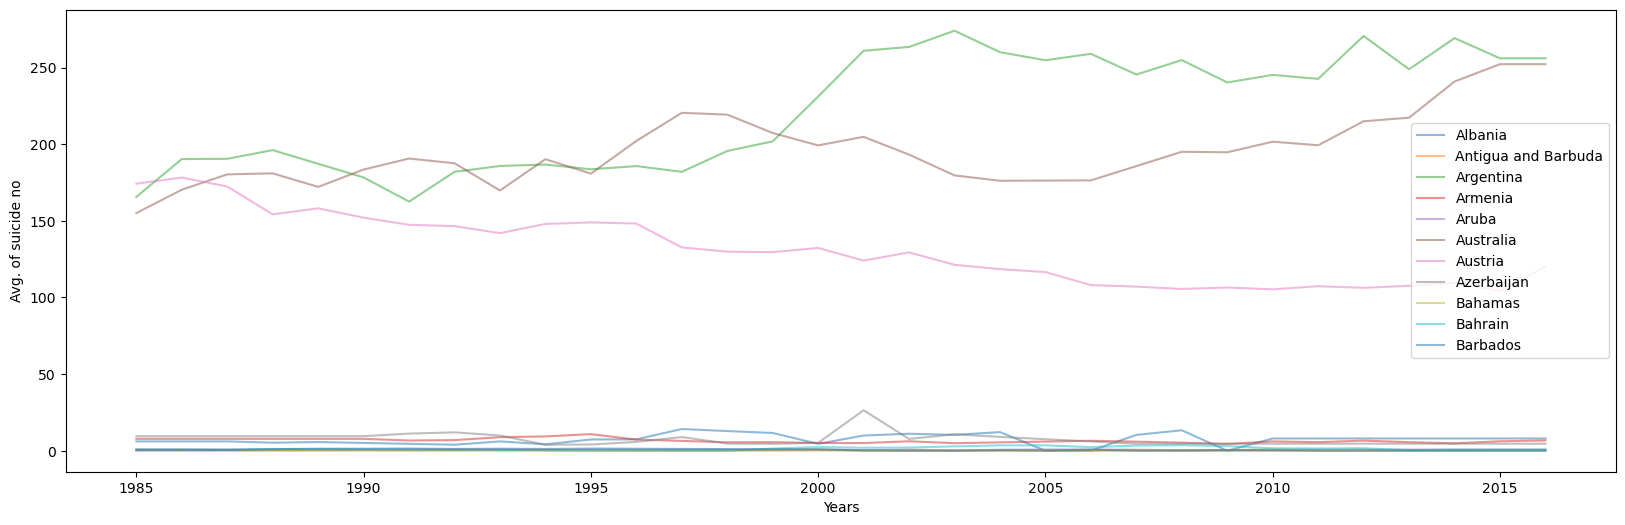

In [136]:
fig, ax = plt.subplots(figsize=(20,6))

l = len(country_yearwise_suicide.columns) 
for i in range(l - 90):
    
    ax.plot(country_yearwise_suicide.index, country_yearwise_suicide.iloc[:,i], alpha=0.5 , label=country_yearwise_suicide.iloc[:,i].name)

ax.legend()
ax.set_xlabel('Years')
ax.set_ylabel('Avg. of suicide no')